# Exercise 06
# TensorFlow and Keras


---

In [1]:
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_moons

%matplotlib inline

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= 0, vmax=1)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

### 1. Multilayer neural network in TensorFlow

You need to create a neural network model in TF that is able to discriminate the two classes in the following dataset:

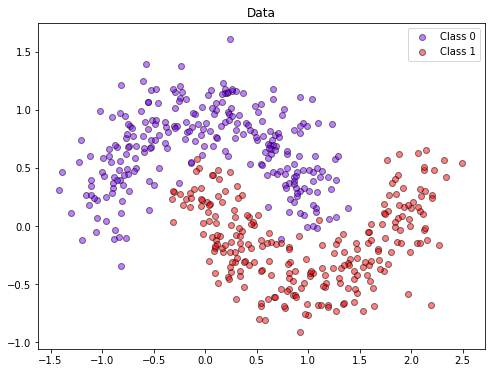

In [2]:
X, Y = make_moons(n_samples=1000, noise= 0.2, random_state=3)
x_train = X[:500]
x_test  = X[500:]
y_train = Y[:500]
y_test  = Y[500:]

pl.figure(figsize=(8, 6))
plot_data(x_train, y_train)

For this you will need to create a neural network with one hidden layer. You cannot use prebuilt models 
such as those in `tf.estimator`. **Hint**: extend the logistic regression example from the TensorFlow handout. 

Your answer must contain the following:
* A visualization of the CG of the model.
* A visualization of the decision region along with the test data.
* A snapshot from TensorBoard that shows the evolution of the training and test loss.

In [3]:
#HAY QUE AGREGAR UNA CAPA DE NEURONAS PARA QUE SEA NO LINEAL

In [4]:
import tensorflow as tf
from IPython.display import clear_output, Image, display, HTML
import numpy as np
import pylab as pl
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline


# Helper functions to inline visualization of computing graphs
# Extracted from: 
# https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb
def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = "<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

# Functions for plotting 2D data and decision regions

def plot_data(X, y):
    y_unique = np.unique(y)
    colors = pl.cm.rainbow(np.linspace(0.0, 1.0, y_unique.size))
    for this_y, color in zip(y_unique, colors):
        this_X = X[y == this_y]
        pl.scatter(this_X[:, 0], this_X[:, 1],  c=color,
                    alpha=0.5, edgecolor='k',
                    label="Class %s" % this_y)
    pl.legend(loc="best")
    pl.title("Data")

def plot_decision_region(X, pred_fun):
    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])
    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05
    x_vals = np.linspace(min_x, max_x, 30)
    y_vals = np.linspace(min_y, max_y, 30)
    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape
    ZZ = np.zeros((grid_r, grid_c))
    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])
    pl.contourf(XX, YY, ZZ, 30, cmap = pl.cm.coolwarm, vmin= -1, vmax=2)
    pl.colorbar()
    pl.xlabel("x")
    pl.ylabel("y")

In [5]:
numN = 10
graph = tf.Graph()
with graph.as_default():
    
    #DATOS ENTRADA:
    x = tf.placeholder(tf.float32,shape=[None,2]) 
    y_true = tf.placeholder(tf.float32,shape=None) 
    
    with tf.name_scope('hidden_layer') as scope: 
        w_1 = tf.Variable(tf.random_normal([numN,2]),dtype=tf.float32,name='weights_1')
        b1 = tf.Variable(tf.random_normal([numN,1]),dtype=tf.float32,name='bias1') 
   
        #h = tf.matmul(w_1,tf.transpose(x)) + b1
        h = tf.sigmoid(tf.matmul(w_1,tf.transpose(x)) + b1, name='sigmoid') #brosfcasting
   
    
    #MODELO INFERENCIA 
    with tf.name_scope('inference') as scope:
        w_2 = tf.Variable(tf.random_normal([1,numN]),dtype=tf.float32,name='weights')
        b = tf.Variable(0,dtype=tf.float32,name='bias') 
        y_pred = tf.sigmoid(tf.matmul(w_2,h) + b )

    #FUNCION DE PERDIDA (SIGMOIDE)
    with tf.name_scope('loss') as scope:
        loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_true,logits=y_pred)
        loss = tf.reduce_mean(loss) 
  
    #FUNCION ENTRENAMIENTO
    with tf.name_scope('train') as scope:
        learning_rate = 1.0
        optimizer = tf.train.GradientDescentOptimizer(learning_rate) 
        train = optimizer.minimize(loss)

    init = tf.global_variables_initializer()
    
show_graph(graph.as_graph_def())

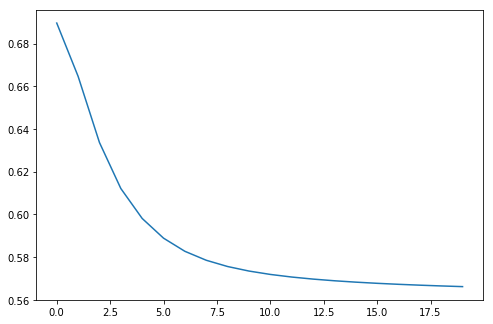

In [6]:
num_epochs = 1000
losses = []

with graph.as_default(): 
    sess = tf.Session()
    sess.run(init)      
    for step in range(num_epochs):
        sess.run(train,{x: x_train, y_true: y_train}) 
        if (step % 50 == 0):
            losses.append(sess.run(loss, {x: x_train, y_true: y_train})) 
                       
pl.figure(figsize = (8,16/3)) 
pl.plot(losses)

[[-0.66721416  0.32913756]
 [-1.5133849   2.2111065 ]
 [-0.9660213   0.52992034]
 [-0.6015433  -1.8477494 ]
 [ 0.5415214  -3.2878127 ]
 [-0.9898577   1.9844078 ]
 [ 0.56888753 -1.7386007 ]
 [-0.2869913   2.3196099 ]
 [-0.67427313  2.0370479 ]
 [ 0.57500684 -2.477814  ]]
[[0.00014396]]


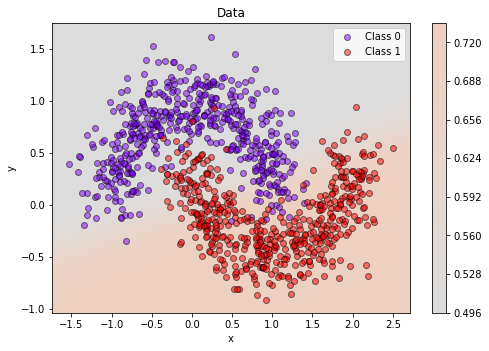

In [7]:
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

with graph.as_default():
    wval = sess.run(w_1)
    print(wval)
    result = sess.run(y_pred, {x:np.array([[1,2]])}) 
    print(result)
    def pred_fun(x1, x2):
        xval = np.array([[x1, x2]])
        return sigmoid(sess.run(y_pred,{x: xval}))

pl.figure(figsize = (8,16/3))    
plot_decision_region(X, pred_fun)
plot_data(X, Y)

### 2. Improving the Keras text classifier

Your goal is to improve the performance of the text classifier in the Keras handout. This is are the things that you need to try:

* Different activation functions for the hidden layer (https://keras.io/activations/)
* Different optimizers (https://keras.io/optimizers/)
* Add dropout between the hidden layer and the output layer (https://keras.io/layers/core/#dropout)
* Different initializers for the dense layers (https://keras.io/initializers/)

Try different combinations and report your findings at the end. Which configuration got the best accuracy in test?


In [8]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import reuters
from keras.layers import Dropout
from keras.preprocessing.text import Tokenizer
import keras
from keras.optimizers import SGD
from keras import initializers

max_words = 1000

print('Loading data...')
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=max_words,
                                                         test_split=0.2)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

num_classes = np.max(y_train) + 1
print(num_classes, 'classes')


Using TensorFlow backend.


Loading data...
8982 train sequences
2246 test sequences
46 classes


In [9]:
print(x_train[101])

[1, 2, 149, 8, 25, 2, 400, 304, 200, 6, 337, 4, 342, 2, 2, 7, 2, 2, 9, 4, 342, 643, 2, 7, 2, 4, 88, 2, 31, 4, 384, 292, 211, 5, 2, 978, 220, 33, 851, 2, 11, 15, 9, 447, 7, 42, 92, 131, 276, 5, 156, 11, 15, 50, 33, 30, 2, 7, 2, 383, 29, 336, 25, 383, 29, 2, 94, 156, 4, 49, 8, 7, 788, 4, 88, 33, 2, 747, 11, 15, 197, 92, 222, 825, 5, 934, 11, 15, 2, 8, 17, 12]


In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
num_words = max(word_index.values()) + 1
words = ['']*num_words
for word in word_index:
    words[word_index[word]] = word
print([words[i-2] for i in x_train[101][1:]])

['', 'dlr', 'and', 'cts', '', '80', 'average', 'companies', 'in', 'income', 'of', 'make', '', '', 'said', '', '', 'a', 'of', 'make', '52', '', 'said', '', 'of', '1987', '', '2', 'of', 'sold', 'general', 'states', 'to', '', 'field', 'securities', 'was', 'agricultural', '', '3', 'it', 'a', '1988', 'said', 'as', 'april', '50', 'term', 'to', 'earlier', '3', 'it', 'but', 'was', 'with', '', 'said', '', 'previously', 'be', 'sell', 'cts', 'previously', 'be', '', 'more', 'earlier', 'of', 'which', 'and', 'said', 'commerce', 'of', '1987', 'was', '', 'august', '3', 'it', 'export', 'april', 'report', 'vice', 'to', 'beef', '3', 'it', '', 'and', '000', 'for']


In [11]:
tokenizer = Tokenizer(num_words=max_words)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (8982, 1000)
x_test shape: (2246, 1000)


In [12]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

y_train shape: (8982, 46)
y_test shape: (2246, 46)


## I. Different Activation Functions for the Hidden Layers

### 1. Elu  & Softmax Activation

In [13]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('elu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_1 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_1 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_2 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_2 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [15]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 183us/step - loss: 2.2328 - acc: 0.5039 - val_loss: 1.8370 - val_acc: 0.5528
Epoch 2/5
8083/8083 [==============================] - 1s 155us/step - loss: 1.6745 - acc: 0.6057 - val_loss: 1.6431 - val_acc: 0.6296
Epoch 3/5
8083/8083 [==============================] - 1s 153us/step - loss: 1.5106 - acc: 0.6537 - val_loss: 1.5329 - val_acc: 0.6719
Epoch 4/5
8083/8083 [==============================] - 1s 156us/step - loss: 1.4001 - acc: 0.6827 - val_loss: 1.4545 - val_acc: 0.6885
Epoch 5/5
8083/8083 [==============================] - 1s 152us/step - loss: 1.3157 - acc: 0.7027 - val_loss: 1.3949 - val_acc: 0.7019


In [16]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 64us/step
Test score: 1.3879778907432794
Test accuracy: 0.692787177203918


### 2. Tanh & Softmax

In [17]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('tanh'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_3 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_3 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_4 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_4 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [19]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 174us/step - loss: 2.1999 - acc: 0.4918 - val_loss: 1.8261 - val_acc: 0.5584
Epoch 2/5
8083/8083 [==============================] - 1s 158us/step - loss: 1.6573 - acc: 0.6019 - val_loss: 1.6391 - val_acc: 0.6307
Epoch 3/5
8083/8083 [==============================] - 1s 149us/step - loss: 1.4963 - acc: 0.6547 - val_loss: 1.5295 - val_acc: 0.6674
Epoch 4/5
8083/8083 [==============================] - 1s 152us/step - loss: 1.3872 - acc: 0.6834 - val_loss: 1.4524 - val_acc: 0.6952
Epoch 5/5
8083/8083 [==============================] - 1s 152us/step - loss: 1.3038 - acc: 0.7068 - val_loss: 1.3957 - val_acc: 0.7041


In [20]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 67us/step
Test score: 1.3764075761592929
Test accuracy: 0.6878895815047216


### 3.Relu & Softmax

In [21]:
model = Sequential()
model.add(Dense(256, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_5 (Dense)                (None, 256)                 256256     
______________________________________________________________________
activation_5 (Activation)      (None, 256)                 0          
______________________________________________________________________
dense_6 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_6 (Activation)      (None, 46)                  0          
Total params: 268,078
Trainable params: 268,078
Non-trainable params: 0
______________________________________________________________________


In [22]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [23]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 1s 166us/step - loss: 2.4796 - acc: 0.4595 - val_loss: 1.9839 - val_acc: 0.5139
Epoch 2/5
8083/8083 [==============================] - 1s 144us/step - loss: 1.7881 - acc: 0.5581 - val_loss: 1.7584 - val_acc: 0.5895
Epoch 3/5
8083/8083 [==============================] - 1s 143us/step - loss: 1.6135 - acc: 0.6138 - val_loss: 1.6383 - val_acc: 0.6363
Epoch 4/5
8083/8083 [==============================] - 1s 146us/step - loss: 1.4953 - acc: 0.6567 - val_loss: 1.5516 - val_acc: 0.6652
Epoch 5/5
8083/8083 [==============================] - 1s 141us/step - loss: 1.4022 - acc: 0.6830 - val_loss: 1.4841 - val_acc: 0.6830


In [24]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 62us/step
Test score: 1.4606847100669746
Test accuracy: 0.6749777382277848


### Advanced Activations

In [25]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_7 (Dense)                (None, 256)                 256256     
______________________________________________________________________
dense_8 (Dense)                (None, 46)                  11822      
______________________________________________________________________
activation_7 (Activation)      (None, 46)                  0          
______________________________________________________________________
p_re_lu_1 (PReLU)              (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [27]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 191us/step - loss: 2.1565 - acc: 0.4952 - val_loss: 1.7884 - val_acc: 0.5640
Epoch 2/5
8083/8083 [==============================] - 1s 163us/step - loss: 1.6180 - acc: 0.6141 - val_loss: 1.5958 - val_acc: 0.6318
Epoch 3/5
8083/8083 [==============================] - 1s 181us/step - loss: 1.4495 - acc: 0.6694 - val_loss: 1.4820 - val_acc: 0.6785
Epoch 4/5
8083/8083 [==============================] - 2s 195us/step - loss: 1.3377 - acc: 0.7028 - val_loss: 1.4082 - val_acc: 0.6908
Epoch 5/5
8083/8083 [==============================] - 2s 188us/step - loss: 1.2537 - acc: 0.7226 - val_loss: 1.3522 - val_acc: 0.7075


In [120]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 75us/step
Test score: 1.3321237574702167
Test accuracy: 0.7016918967317919


## II. Different Optimizers

### 1. RMSprop

In [132]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_67 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_68 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_56 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_15 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________


C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


In [133]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0),
              metrics=['accuracy'])

In [134]:
batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 317us/step - loss: 1.2078 - acc: 0.7345 - val_loss: 1.0215 - val_acc: 0.7753
Epoch 2/5
8083/8083 [==============================] - 2s 231us/step - loss: 0.6619 - acc: 0.8520 - val_loss: 0.9467 - val_acc: 0.7998
Epoch 3/5
8083/8083 [==============================] - 2s 219us/step - loss: 0.4768 - acc: 0.8901 - val_loss: 0.9763 - val_acc: 0.8076
Epoch 4/5
8083/8083 [==============================] - 2s 217us/step - loss: 0.3826 - acc: 0.9118 - val_loss: 1.0027 - val_acc: 0.8087
Epoch 5/5
8083/8083 [==============================] - 2s 212us/step - loss: 0.3208 - acc: 0.9239 - val_loss: 1.0957 - val_acc: 0.7920


In [135]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

2246/2246 [==============================] - 0s 76us/step
Test score: 1.0250520476887297
Test accuracy: 0.7880676759212865


### 2. Adagrad

In [131]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_65 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_66 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_55 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_14 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 2s 276us/step - loss: 1.0930 - acc: 0.7571 - val_loss: 0.9726 - val_acc: 0.7820
Epoch 2/5
8083/8083 [===============

### 3. Adam

In [126]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_55 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_56 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_50 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_9 (PReLU)              (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 366us/step - loss: 1.2452 - acc: 0.7284 - val_loss: 1.0128 - val_acc: 0.7731
Epoch 2/5
8083/8083 [===============

### 4. Adamax

In [127]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adamax(),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_57 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_58 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_51 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_10 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 311us/step - loss: 1.3117 - acc: 0.7142 - val_loss: 1.0925 - val_acc: 0.7653
Epoch 2/5
8083/8083 [===============

### 5. Nadam

In [136]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
#model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_69 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dense_70 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_57 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_16 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [==============================] - 3s 397us/step - loss: 1.1262 - acc: 0.7565 - val_loss: 0.9398 - val_acc: 0.7931
Epoch 2/5
8083/8083 [===============

## III. Dropout

In [137]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_71 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dropout_1 (Dropout)            (None, 256)                 0          
______________________________________________________________________
dense_72 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_58 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_17 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

## IV. Different Initializers

In [166]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, kernel_initializer='random_normal', input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='random_normal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_94 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dropout_10 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_95 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_69 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_29 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [167]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256, input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='zeros'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_96 (Dense)               (None, 256)                 256256     
______________________________________________________________________
dropout_11 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_97 (Dense)               (None, 46)                  11822      
______________________________________________________________________
activation_70 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_30 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [171]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='ones'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_104 (Dense)              (None, 256)                 256256     
______________________________________________________________________
dropout_15 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_105 (Dense)              (None, 46)                  11822      
______________________________________________________________________
activation_74 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_34 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [172]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='glorot_uniform'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_106 (Dense)              (None, 256)                 256256     
______________________________________________________________________
dropout_16 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_107 (Dense)              (None, 46)                  11822      
______________________________________________________________________
activation_75 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_35 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [176]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='Orthogonal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_114 (Dense)              (None, 256)                 256256     
______________________________________________________________________
dropout_20 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_115 (Dense)              (None, 46)                  11822      
______________________________________________________________________
activation_78 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_39 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

In [178]:
model = Sequential()
act = keras.layers.advanced_activations.PReLU(init='zero', weights=None)
model.add(Dense(256,input_shape=(max_words,)))
model.add(Dropout(0.5))
model.add(Dense(num_classes,kernel_initializer='lecun_normal'))
model.add(Activation('softmax'))
model.add(act)
model.summary(70)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0),
              metrics=['accuracy'])

batch_size = 32
epochs = 5
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `PReLU` call to the Keras 2 API: `PReLU(weights=None, alpha_initializer="zero")`
  


______________________________________________________________________
Layer (type)                   Output Shape                Param #    
dense_118 (Dense)              (None, 256)                 256256     
______________________________________________________________________
dropout_22 (Dropout)           (None, 256)                 0          
______________________________________________________________________
dense_119 (Dense)              (None, 46)                  11822      
______________________________________________________________________
activation_80 (Activation)     (None, 46)                  0          
______________________________________________________________________
p_re_lu_41 (PReLU)             (None, 46)                  46         
Total params: 268,124
Trainable params: 268,124
Non-trainable params: 0
______________________________________________________________________
Train on 8083 samples, validate on 899 samples
Epoch 1/5
8083/8083 [========

La estrategia utilizada fue empezar cambiando las activaciones. Se probaron distintas activaciones como: relu, elu, tanh, hard_sigmoid y activaciones avanzadas como PRelu. Esta última ofreció los mejores resultados y fue el cambio que tuvo el mayor efecto en la mejora del Test Accuracy. Recordamos que en el ejercicio incial, el test accuracy estaba en un 52%, mientrás que con esta activación, la precisión subió a 70%. 
Utilizando esta activación se probaron distintos optimizadores como:RMSprop, Adagrad, Adam, Adamax y Nadam. El mejor optimizador fue Adagrad que subió la precisión a 77%. Se utilizó este modelo para después probar el cambio y agregar el Dropout que subió el accuracy a 80%.
Al final se probaron distintos inicializadores como: random_normal, ceros, unos, glorot_uniform, ortogonal y lecun_normal que fue el inicializador que ofreció los mejores resultados entre todos los inicializadores. Sin embargo, todos los inicializadores desmejoraron el modelo. lo que en conduce a la conclusión de no agregar un inicializador al modelo.
En otras palabras, el mejor modelo con un 80% de precisión fue el que utilizó activación avanzada Prelu, optimizador Adagrad y un Dropout.